In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install kaggle

In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [4]:
!pip3 install pycaret==3.0.0
from pycaret.utils import version
version()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.6/172.6 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.7/20.7 MB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 17.8 MB/s e

'3.0.0'

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [7]:
url = 'https://raw.githubusercontent.com/SazSrijith/StrokePrediction/main/dataset/riceClassification.csv'
df = pd.read_csv(url)
df.head(25)

id  Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    1  4537        92.229316        64.012769      0.719916        4677   
1    2  2872        74.691881        51.400454      0.725553        3015   
2    3  3048        76.293164        52.043491      0.731211        3132   
3    4  3073        77.033628        51.928487      0.738639        3157   
4    5  3693        85.124785        56.374021      0.749282        3802   
5    6  2990        77.417073        50.954344      0.752861        3080   
6    7  3556        84.323564        55.413061      0.753762        3636   
7    8  3788        86.952411        56.444769      0.760664        3866   
8    9  2629        74.133114        48.074144      0.761228        2790   
9   10  5719       106.721142        68.977700      0.763053        5819   
10  11  2665        74.364021        48.053188      0.763178        2777   
11  12  3231        81.304200        52.451136      0.764080        3330   
12  13  2805        77.047682        49.242678      0.769107        2950   
13  14  3265        83.378487        52.764865      0.774286        3420   
14  15  4301        94.915392        59.822820      0.776372        4427   
15  16  3393        84.058480        52.951486      0.776647        3477   
16  17  3475        84.581148        53.191205      0.777504        3539   
17  18  4577        98.358549        60.753330      0.786436        4652   
18  19  3028        81.277552        49.167362      0.796277        3114   
19  20  3552        88.029378        53.176037      0.796930        3654   
20  21  3852        92.208290        55.277012      0.800390        4023   
21  22  3163        83.823270        50.024655      0.802400        3232   
22  23  3910        92.589323        55.111403      0.803560        4067   
23  24  3505        88.001794        52.277039      0.804432        3586   
24  25  2647        76.789043        45.529112      0.805268        2710   

    EquivDiameter    Extent  Perimeter  Roundness  AspectRation  Class  
0       76.004525  0.657536    273.085   0.764510      1.440796      1  
1       60.471018  0.713009    208.317   0.831658      1.453137      1  
2       62.296341  0.759153    210.012   0.868434      1.465950      1  
3       62.551300  0.783529    210.657   0.870203      1.483456      1  
4       68.571668  0.769375    230.332   0.874743      1.510000      1  
5       61.700780  0.584898    216.930   0.798439      1.519342      1  
6       67.287739  0.750211    227.007   0.867148      1.521727      1  
7       69.448048  0.800676    235.476   0.858473      1.540487      1  
8       57.856260  0.640595    207.325   0.768594      1.542058      1  
9       85.332625  0.754983    281.839   0.904748      1.547183      1  
10      58.251038  0.596731    202.456   0.817045      1.547536      1  
11      64.139200  0.614960    218.773   0.848319      1.550094      1  
12      59.761500  0.603226    209.823   0.800639      1.564653      1  
13      64.475787  0.575838    227.853   0.790285      1.580190      1  
14      74.001374  0.801230    257.607   0.814449      1.586608      1  
15      65.727481  0.688515    224.485   0.846095      1.587462      1  
16      66.516971  0.652215    221.295   0.891706      1.590134      1  
17      76.338833  0.591726    259.184   0.856198      1.618982      1  
18      62.091621  0.753609    211.667   0.849297      1.653079      1  
19      67.249884  0.623705    232.122   0.828419      1.655433      1  
20      70.032269  0.653990    245.517   0.803032      1.668113      1  
21      63.460670  0.584442    221.380   0.811021      1.675639      1  
22      70.557541  0.622810    252.523   0.770521      1.680039      1  
23      66.803477  0.594773    229.044   0.839576      1.683374      1  
24      58.053984  0.598192    200.587   0.826720      1.686592      1

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             18185 non-null  int64  
 1   MajorAxisLength  18185 non-null  float64
 2   MinorAxisLength  18185 non-null  float64
 3   Eccentricity     18185 non-null  float64
 4   ConvexArea       18185 non-null  int64  
 5   EquivDiameter    18185 non-null  float64
 6   Extent           18185 non-null  float64
 7   Perimeter        18185 non-null  float64
 8   Roundness        18185 non-null  float64
 9   AspectRation     18185 non-null  float64
 10  Class            18185 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 1.5 MB


In [9]:
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of duplicated rows is:  0
Number of rows with NaNs is:  0


In [10]:
df = df.drop("id", axis=1)

In [13]:
sns.pairplot(df, hue='Class')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

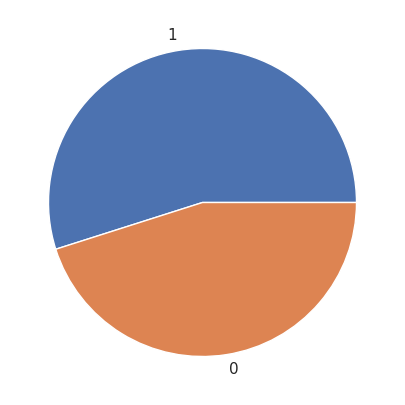

In [14]:
y =df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [15]:
X = df.drop(columns=['Class'])
X.head(10)

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  4537        92.229316        64.012769      0.719916        4677   
1  2872        74.691881        51.400454      0.725553        3015   
2  3048        76.293164        52.043491      0.731211        3132   
3  3073        77.033628        51.928487      0.738639        3157   
4  3693        85.124785        56.374021      0.749282        3802   
5  2990        77.417073        50.954344      0.752861        3080   
6  3556        84.323564        55.413061      0.753762        3636   
7  3788        86.952411        56.444769      0.760664        3866   
8  2629        74.133114        48.074144      0.761228        2790   
9  5719       106.721142        68.977700      0.763053        5819   

   EquivDiameter    Extent  Perimeter  Roundness  AspectRation  
0      76.004525  0.657536    273.085   0.764510      1.440796  
1      60.471018  0.713009    208.317   0.831658      1.453137  
2      62.296341  0.759153    210.012   0.868434      1.465950  
3      62.551300  0.783529    210.657   0.870203      1.483456  
4      68.571668  0.769375    230.332   0.874743      1.510000  
5      61.700780  0.584898    216.930   0.798439      1.519342  
6      67.287739  0.750211    227.007   0.867148      1.521727  
7      69.448048  0.800676    235.476   0.858473      1.540487  
8      57.856260  0.640595    207.325   0.768594      1.542058  
9      85.332625  0.754983    281.839   0.904748      1.547183

In [16]:
X.describe().transpose()

count         mean          std          min          25%  \
Area             18185.0  7036.492989  1467.197150  2522.000000  5962.000000   
MajorAxisLength  18185.0   151.680754    12.376402    74.133114   145.675910   
MinorAxisLength  18185.0    59.807851    10.061653    34.409894    51.393151   
Eccentricity     18185.0     0.915406     0.030575     0.676647     0.891617   
ConvexArea       18185.0  7225.817872  1502.006571  2579.000000  6125.000000   
EquivDiameter    18185.0    94.132952     9.906250    56.666658    87.126656   
Extent           18185.0     0.616653     0.104389     0.383239     0.538530   
Perimeter        18185.0   351.606949    29.500620   197.015000   333.990000   
Roundness        18185.0     0.707998     0.067310     0.174590     0.650962   
AspectRation     18185.0     2.599081     0.434836     1.358128     2.208527   

                         50%          75%           max  
Area             6660.000000  8423.000000  10210.000000  
MajorAxisLength   153.883750   160.056214    183.211434  
MinorAxisLength    55.724288    70.156593     82.550762  
Eccentricity        0.923259     0.941372      0.966774  
ConvexArea       6843.000000  8645.000000  11008.000000  
EquivDiameter      92.085696   103.559146    114.016559  
Extent              0.601194     0.695664      0.886573  
Perimeter         353.088000   373.003000    508.511000  
Roundness           0.701941     0.769280      0.904748  
AspectRation        2.602966     2.964101      3.911845

In [17]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0 -1.703630        -4.803744         0.417927     -6.393938   -1.696989   
1 -2.838478        -6.220789        -0.835611     -6.209583   -2.803539   
2 -2.718519        -6.091404        -0.771700     -6.024520   -2.725641   
3 -2.701479        -6.031573        -0.783130     -5.781578   -2.708996   
4 -2.278893        -5.377799        -0.341288     -5.433479   -2.279559   
5 -2.758051        -6.000590        -0.879950     -5.316410   -2.760262   
6 -2.372271        -5.442538        -0.436798     -5.286951   -2.390080   
7 -2.214142        -5.230124        -0.334257     -5.061184   -2.236948   
8 -3.004105        -6.265938        -1.166213     -5.042738   -2.953342   
9 -0.897991        -3.632788         0.911391     -4.983052   -0.936651   

   EquivDiameter    Extent  Perimeter  Roundness  AspectRation  
0      -1.830049  0.391654  -2.661778   0.839588     -2.663800  
1      -3.398143  0.923070  -4.857318   1.837215     -2.635418  
2      -3.213879  1.365122  -4.799860   2.383587     -2.605950  
3      -3.188141  1.598635  -4.777995   2.409877     -2.565690  
4      -2.580390  1.463045  -4.111042   2.477331     -2.504645  
5      -3.274000 -0.304202  -4.565350   1.343680     -2.483161  
6      -2.710001  1.279457  -4.223754   2.364484     -2.477675  
7      -2.491920  1.762905  -3.936668   2.235600     -2.434533  
8      -3.662101  0.229356  -4.890945   0.900273     -2.430919  
9      -0.888385  1.325177  -2.365031   2.923116     -2.419132

In [18]:
X.describe().transpose()

count          mean       std       min       25%  \
Area             18185.0  7.502018e-17  1.000027 -3.077035 -0.732364   
MajorAxisLength  18185.0 -1.750471e-15  1.000027 -6.265938 -0.485198   
MinorAxisLength  18185.0 -3.876043e-16  1.000027 -2.524303 -0.836337   
Eccentricity     18185.0 -1.369118e-15  1.000027 -7.809152 -0.778086   
ConvexArea       18185.0  1.875505e-16  1.000027 -3.093825 -0.732918   
EquivDiameter    18185.0  1.487900e-15  1.000027 -3.782190 -0.707280   
Extent           18185.0 -7.658310e-16  1.000027 -2.236051 -0.748401   
Perimeter        18185.0 -1.137806e-15  1.000027 -5.240439 -0.597189   
Roundness        18185.0  2.813257e-16  1.000027 -7.924849 -0.847385   
AspectRation     18185.0 -1.750471e-16  1.000027 -2.853917 -0.898188   

                      50%       75%       max  
Area            -0.256614  0.945030  2.163032  
MajorAxisLength  0.178005  0.676747  2.547715  
MinorAxisLength -0.405865  1.028561  2.260418  
Eccentricity     0.256851  0.849263  1.680082  
ConvexArea      -0.254878  0.944883  2.518156  
EquivDiameter   -0.206669  0.951566  2.007233  
Extent          -0.148095  0.756913  2.585776  
Perimeter        0.050205  0.725295  5.318816  
Roundness       -0.089998  0.910465  2.923116  
AspectRation     0.008934  0.839464  3.019065

In [19]:
observations = list(df.index)
variables = list(df.columns)

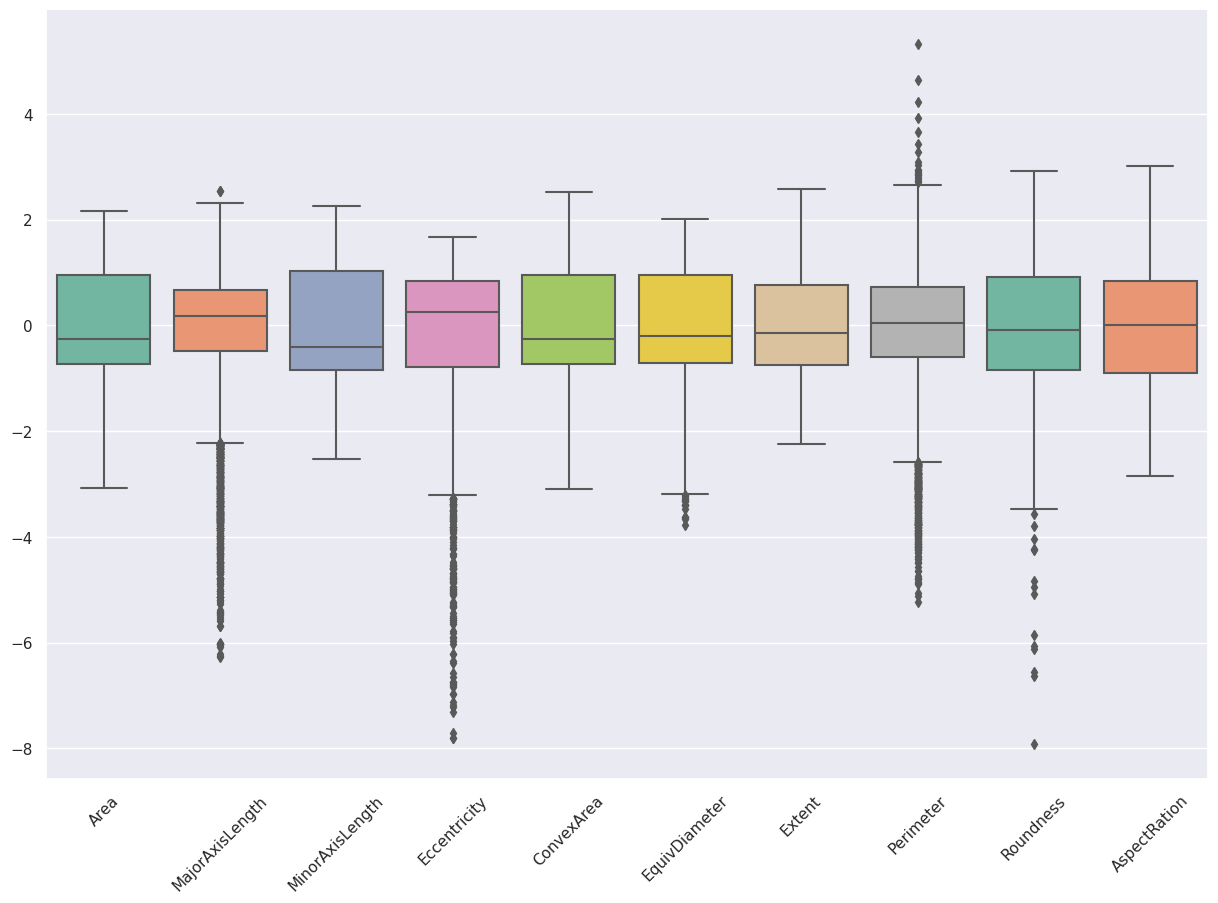

In [20]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

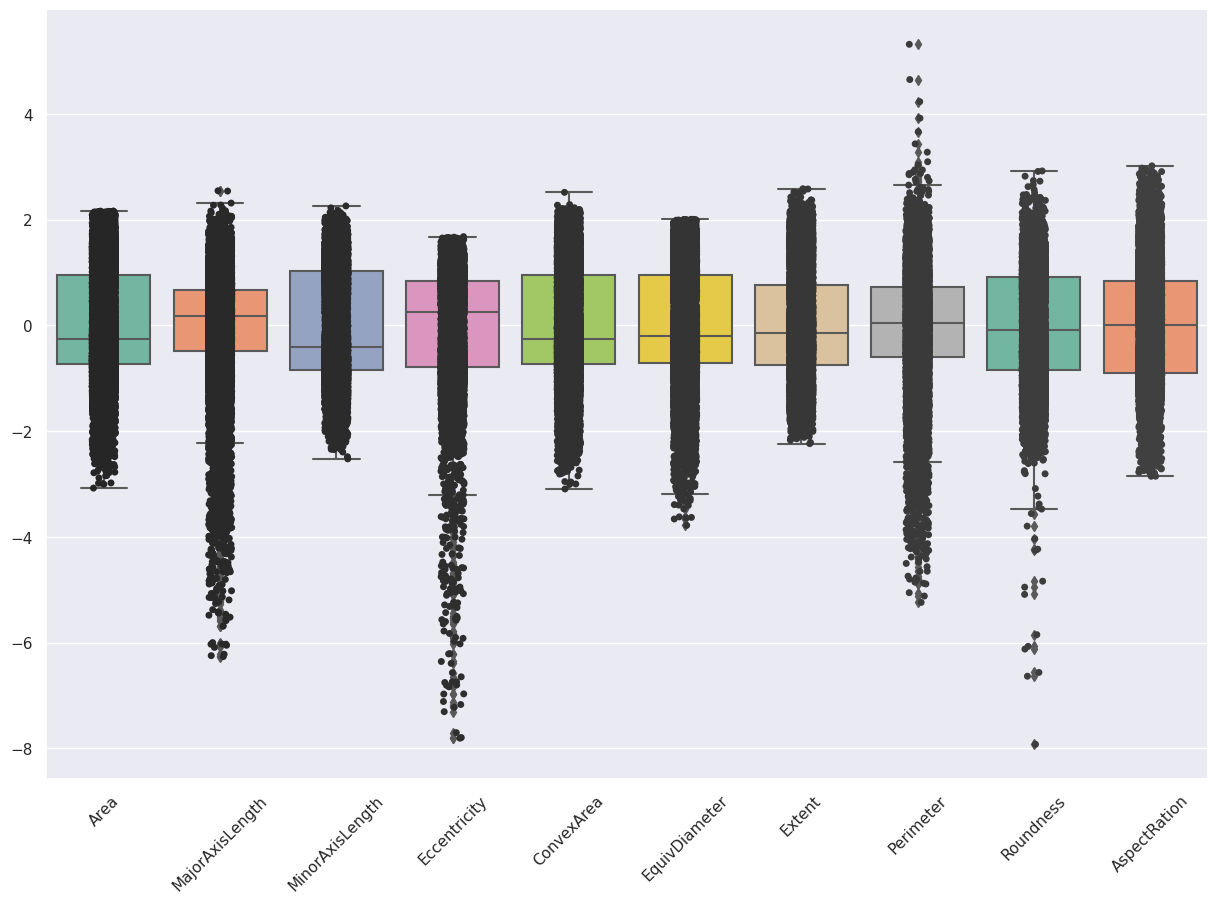

In [21]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

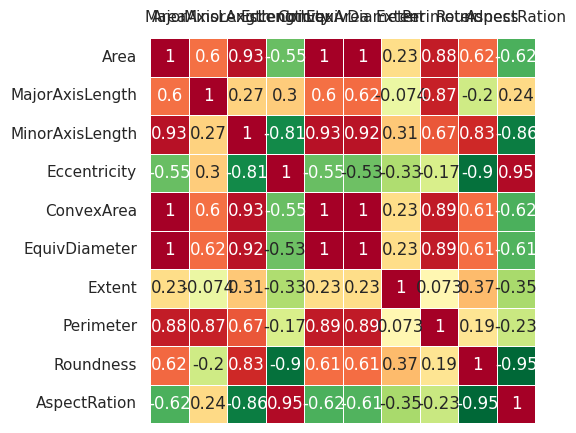

In [23]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);
# X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
# sns.clustermap(X.corr(), annot=True, fmt='.2f')

Text(0, 0.5, 'Z2')

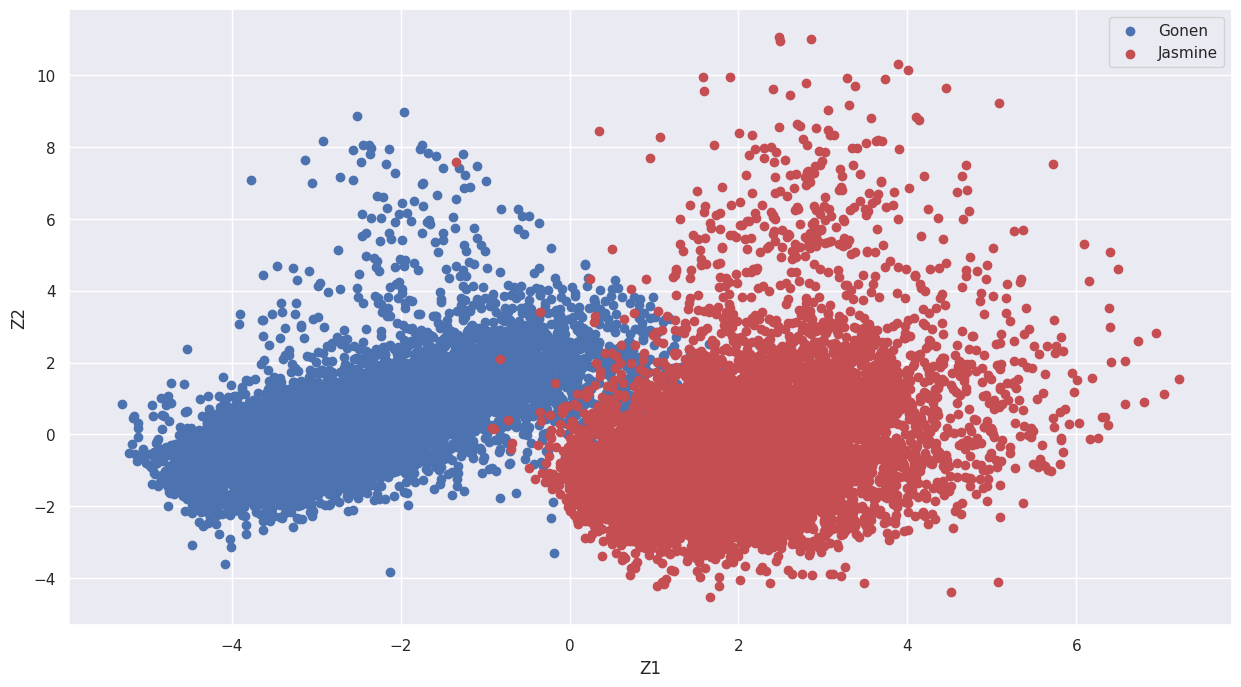

In [26]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Jasmine->1,  Gonen->0
idx_Gonen = np.where(y == 0)
idx_Jasmine = np.where(y == 1)

plt. figure(figsize=(15,8))
plt.scatter(Z[idx_Gonen,0], Z[idx_Gonen,1], c='b', label='Gonen')
plt.scatter(Z[idx_Jasmine,0], Z[idx_Jasmine,1], c='r', label='Jasmine')

plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')

**Eigenvectors**

array([[-3.82711630e-01, -1.54080516e-01, -1.85952483e-02,
        -9.47182662e-02,  4.86722024e-02,  4.25135577e-01,
        -2.63757801e-01,  1.63361821e-01, -4.92808717e-01,
         5.46121538e-01],
       [-1.53667795e-01, -5.63744588e-01,  9.79499107e-02,
        -1.93224954e-01, -3.79695762e-01, -4.53584819e-01,
        -3.45618750e-01, -3.12732230e-01,  1.48039599e-01,
         1.50235247e-01],
       [-3.92051947e-01,  6.92364875e-02, -7.07274017e-02,
         7.83622592e-02,  7.48669016e-02,  1.46119325e-01,
         5.15517900e-01, -5.42974618e-01,  3.41571430e-01,
         3.55178092e-01],
       [ 2.91012186e-01, -3.87247843e-01,  1.37661138e-01,
        -5.45394886e-01,  6.42874661e-01,  4.26434089e-02,
         1.59920781e-01, -2.51651507e-02,  6.53244736e-02,
         5.79941944e-02],
       [-3.82111043e-01, -1.57654605e-01, -2.00274120e-02,
        -3.09522649e-02,  1.04730661e-01,  4.77527614e-01,
        -3.57657601e-01,  9.04436745e-02,  5.09537291e-01,
        -4.

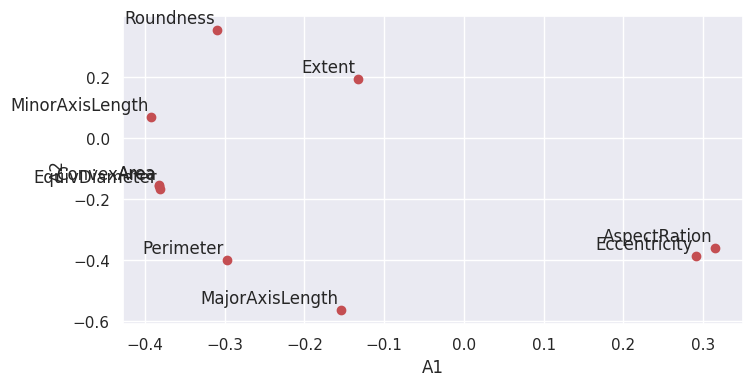

In [27]:
A = pca.components_.T
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

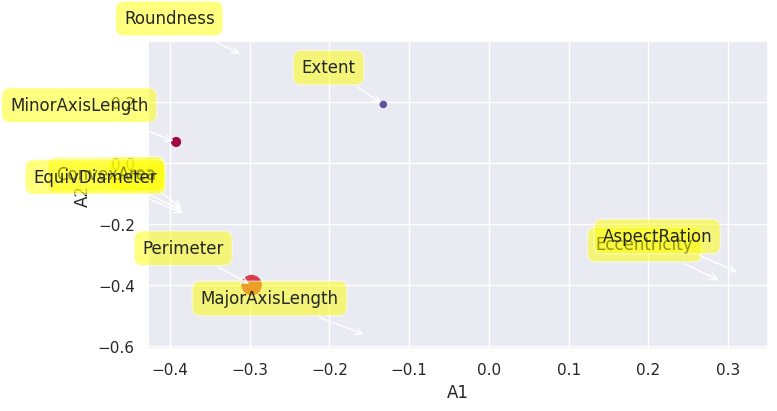

In [29]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree Plot**

array([6.38246162e+00, 2.60627856e+00, 8.38749613e-01, 1.14902472e-01,
       4.48562668e-02, 8.59683693e-03, 2.57994437e-03, 1.54518501e-03,
       4.01613916e-04, 1.77825801e-04])

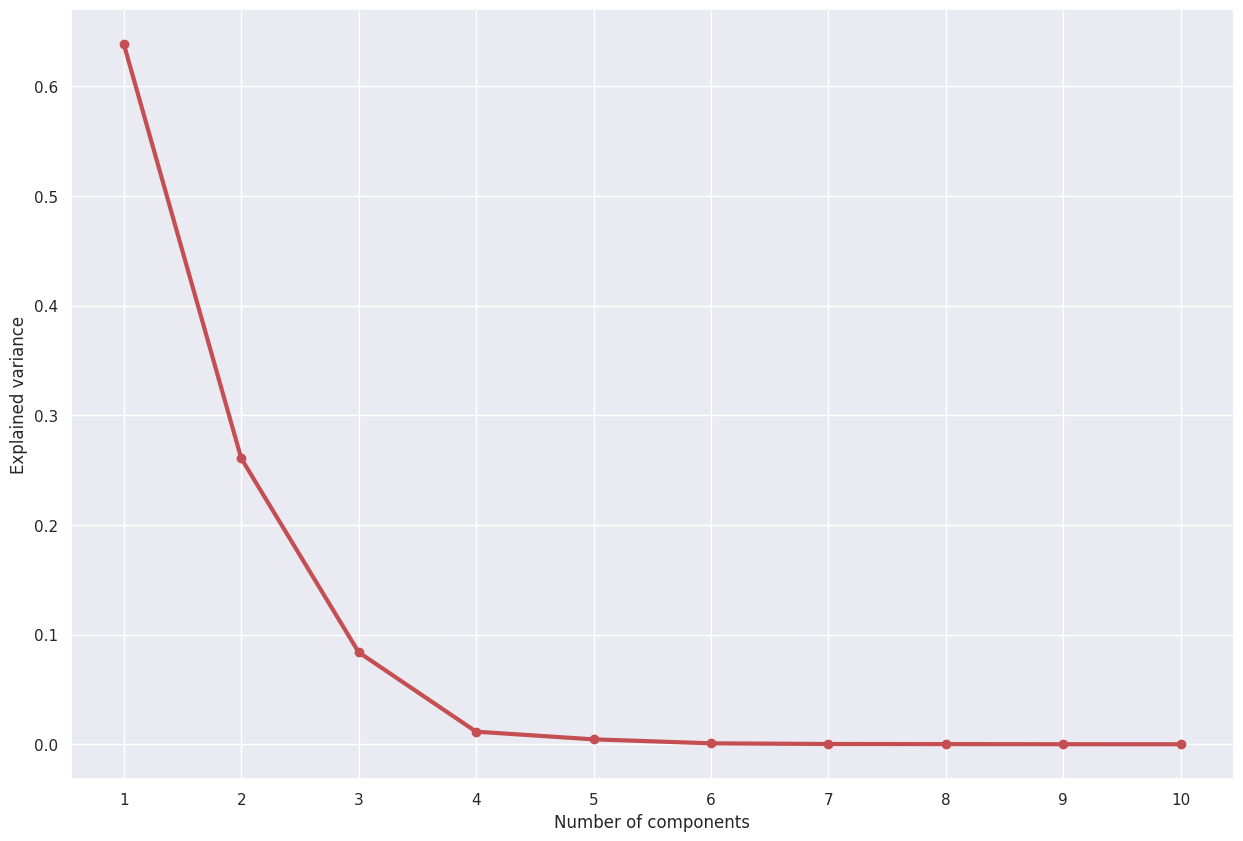

In [30]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

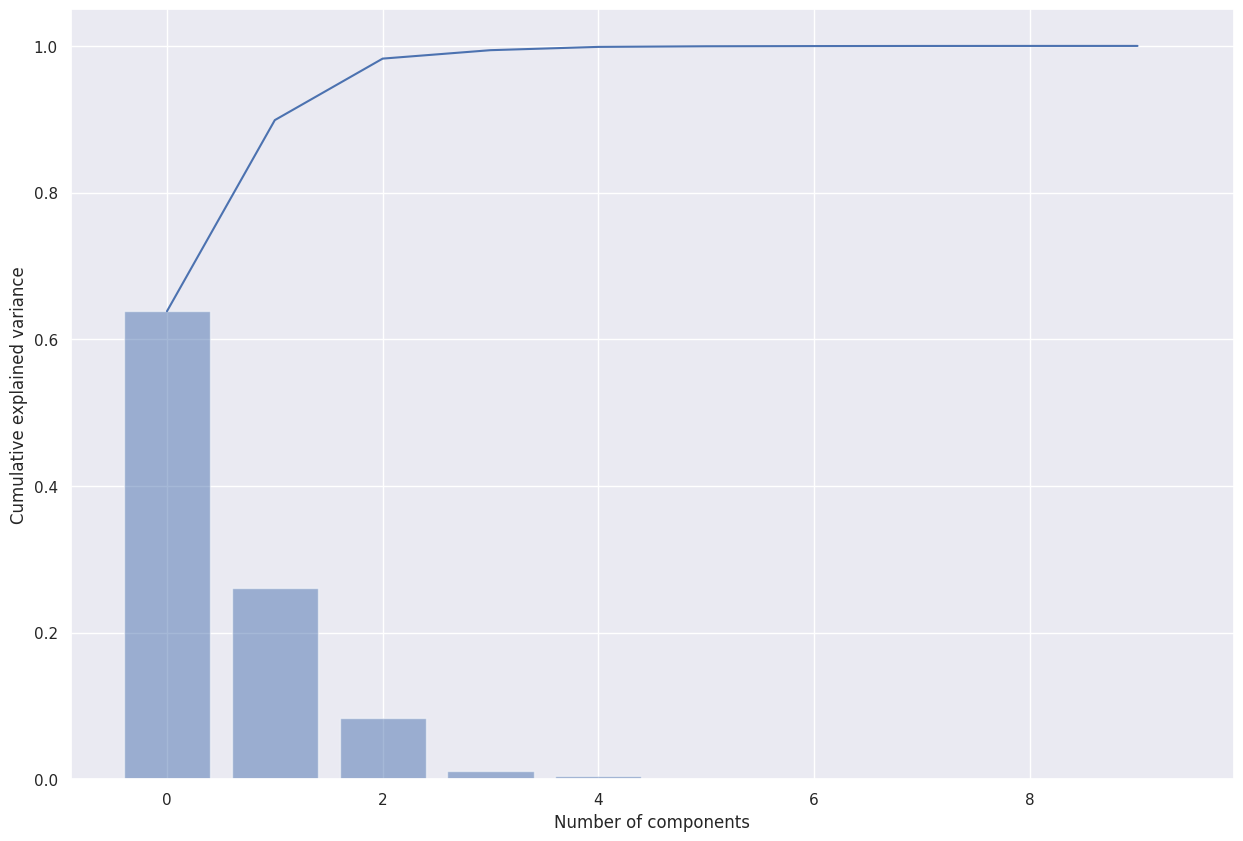

In [31]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Bi Plot**

array([ 8.44244654, 11.01374522, 11.05660034, ..., -0.66273891,
       -0.80484537, -0.71083772])

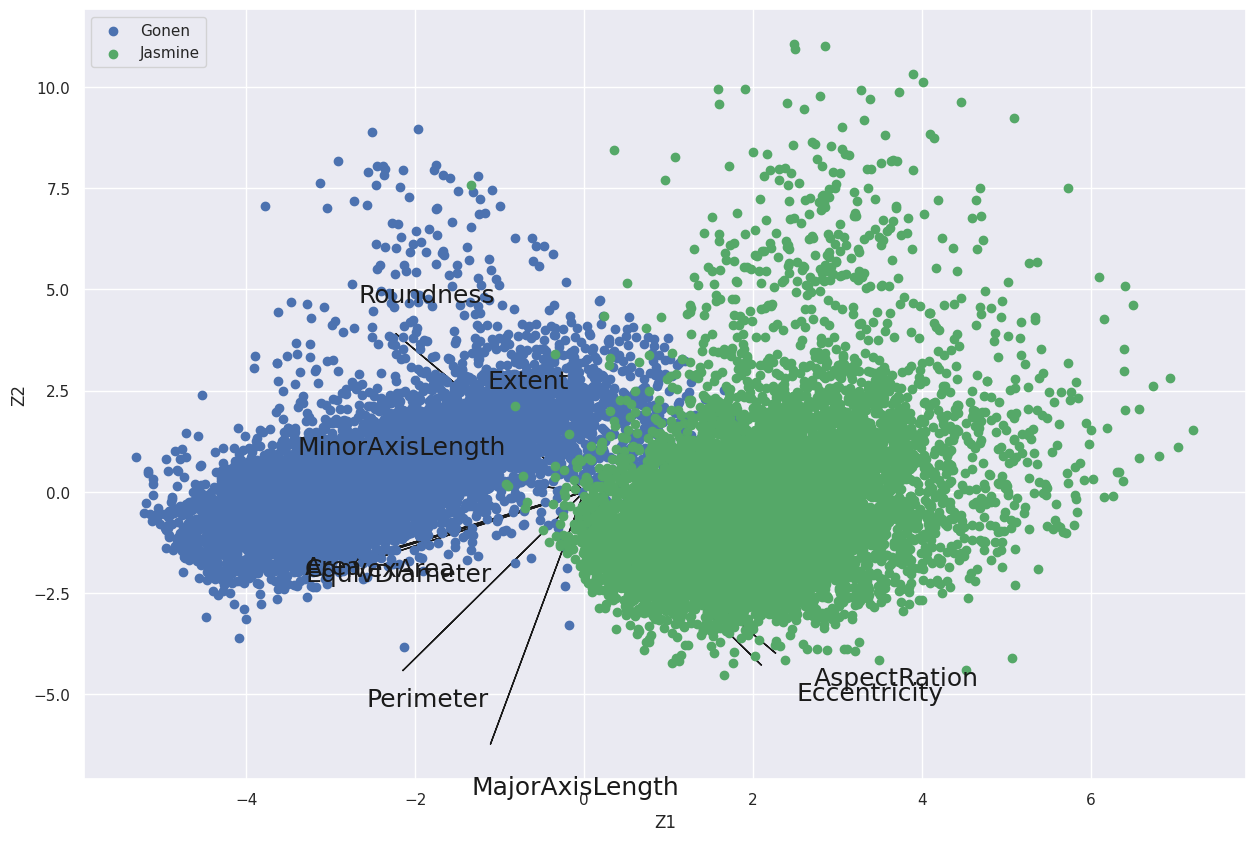

In [38]:
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('Z1')
plt.ylabel('Z2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Gonen,0], Z[idx_Gonen,1], c='b', label='Gonen')
plt.scatter(Z[idx_Jasmine,0], Z[idx_Jasmine,1], c='g', label='Jasmine')

plt.legend(loc='upper left')
Z1
Z2

**Principal Component Analysis**

In [34]:
!pip install pca

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 2.7 MB/s eta 0:00:00


In [35]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [10] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [10] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [36]:
out['PC']

PC1        PC2       PC3
0      0.354083   8.442447 -1.355742
1      2.854920  11.013745 -0.931820
2      2.482805  11.056600 -0.515969
3      2.493232  10.949386 -0.246925
4      1.581389   9.952350 -0.305457
...         ...        ...       ...
18180  2.294296  -0.298537 -0.786845
18181 -0.224148  -2.334744  0.724407
18182  1.488253  -0.662739 -0.197156
18183  2.203078  -0.804845 -0.773643
18184  1.969808  -0.710838 -0.827181

[18185 rows x 3 columns]

**Scatter Plot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [99.41%] of the variance'}, xlabel='PC1 (63.8% expl.var)', ylabel='PC2 (26.0% expl.var)'>)

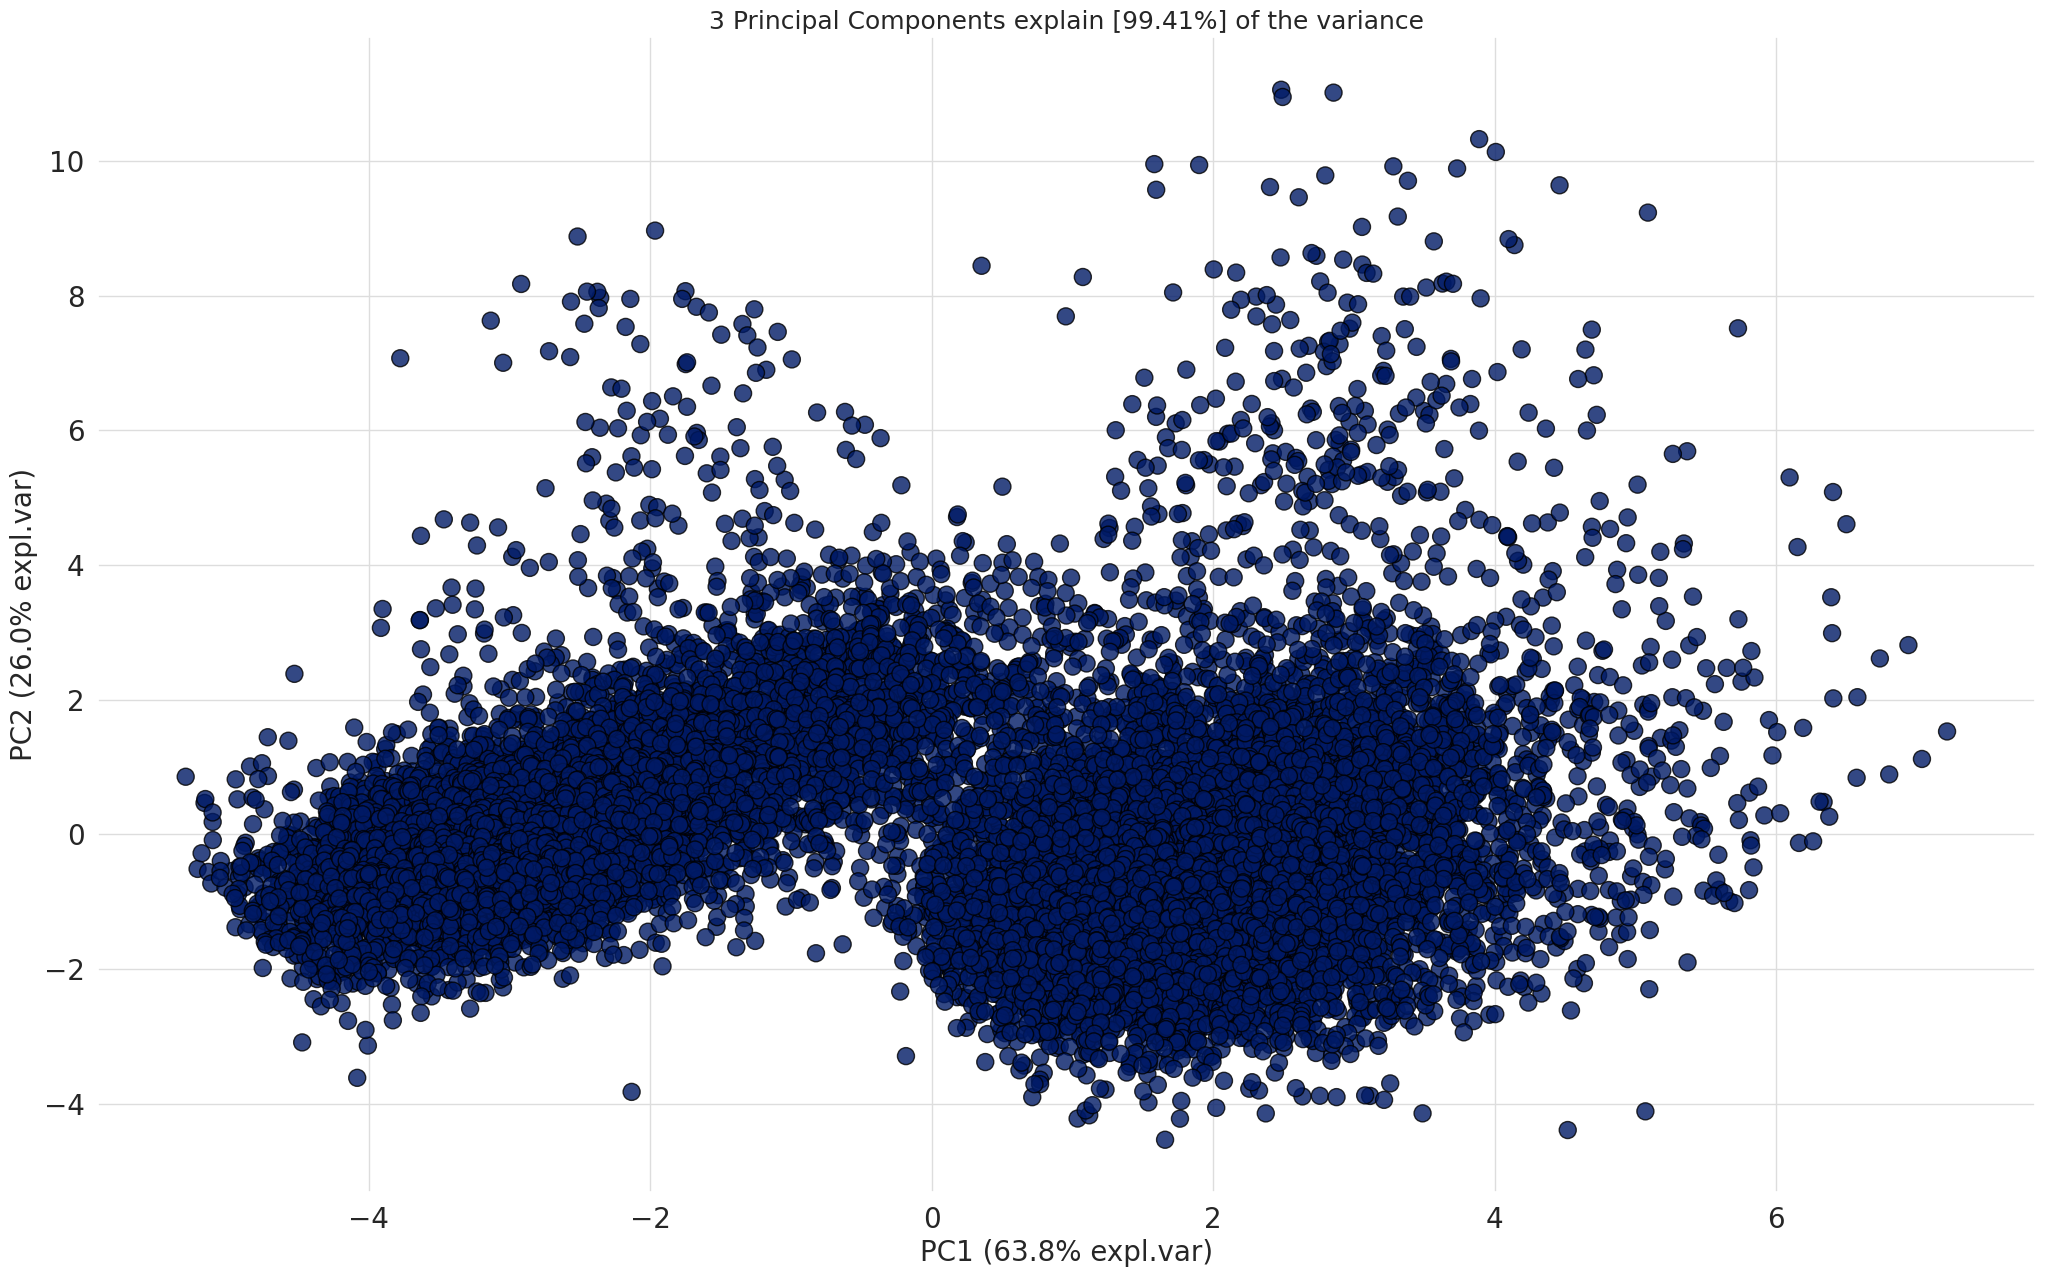

In [37]:
model.scatter(label=True, legend=False)

**Eigen Vectors**

In [39]:
A = out['loadings'].T
A

PC1       PC2       PC3
Area            -0.382712 -0.154081 -0.018595
MajorAxisLength -0.153668 -0.563745  0.097950
MinorAxisLength -0.392052  0.069236 -0.070727
Eccentricity     0.291012 -0.387248  0.137661
ConvexArea      -0.382111 -0.157655 -0.020027
EquivDiameter   -0.380981 -0.165921 -0.015129
Extent          -0.132351  0.192156  0.971641
Perimeter       -0.297461 -0.399377  0.024917
Roundness       -0.308990  0.353253 -0.083476
AspectRation     0.314476 -0.360693  0.117483

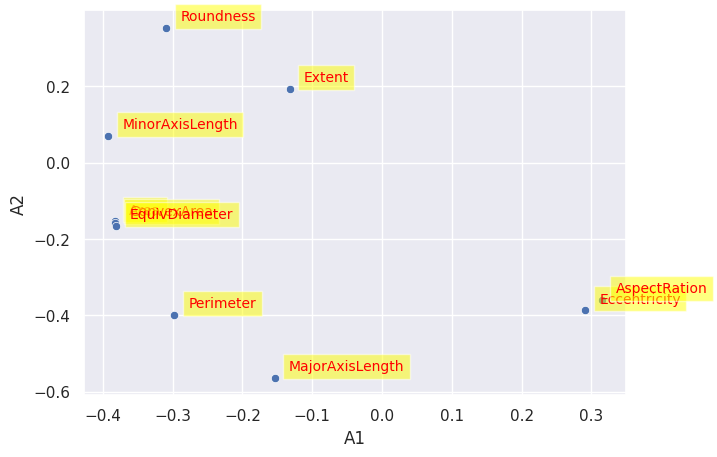

In [40]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('A1')
plt.ylabel('A2')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

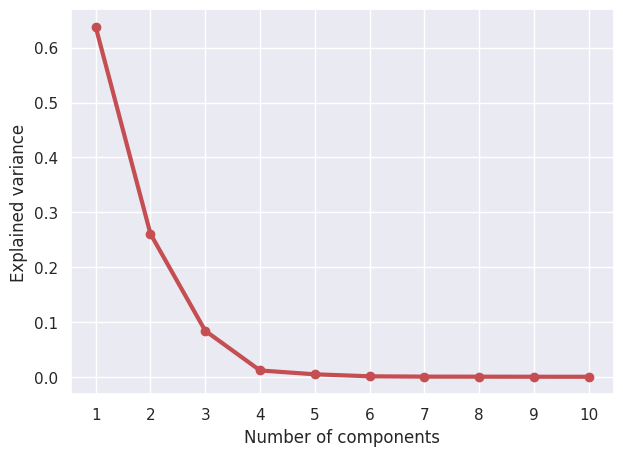

In [41]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

**Explained Variance Plot**

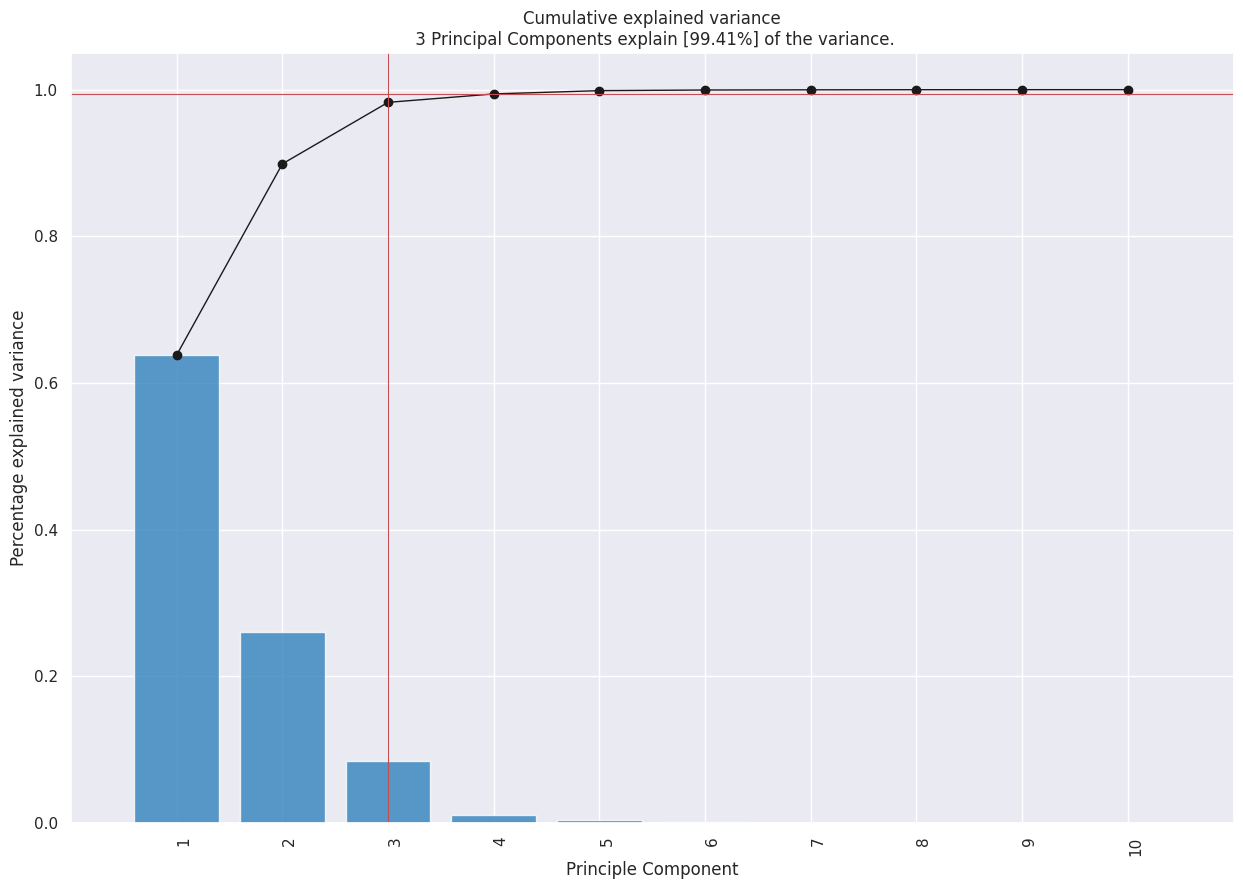

In [42]:
model.plot();

**Biplot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [99.41%] of the variance'}, xlabel='PC1 (63.8% expl.var)', ylabel='PC2 (26.0% expl.var)'>)

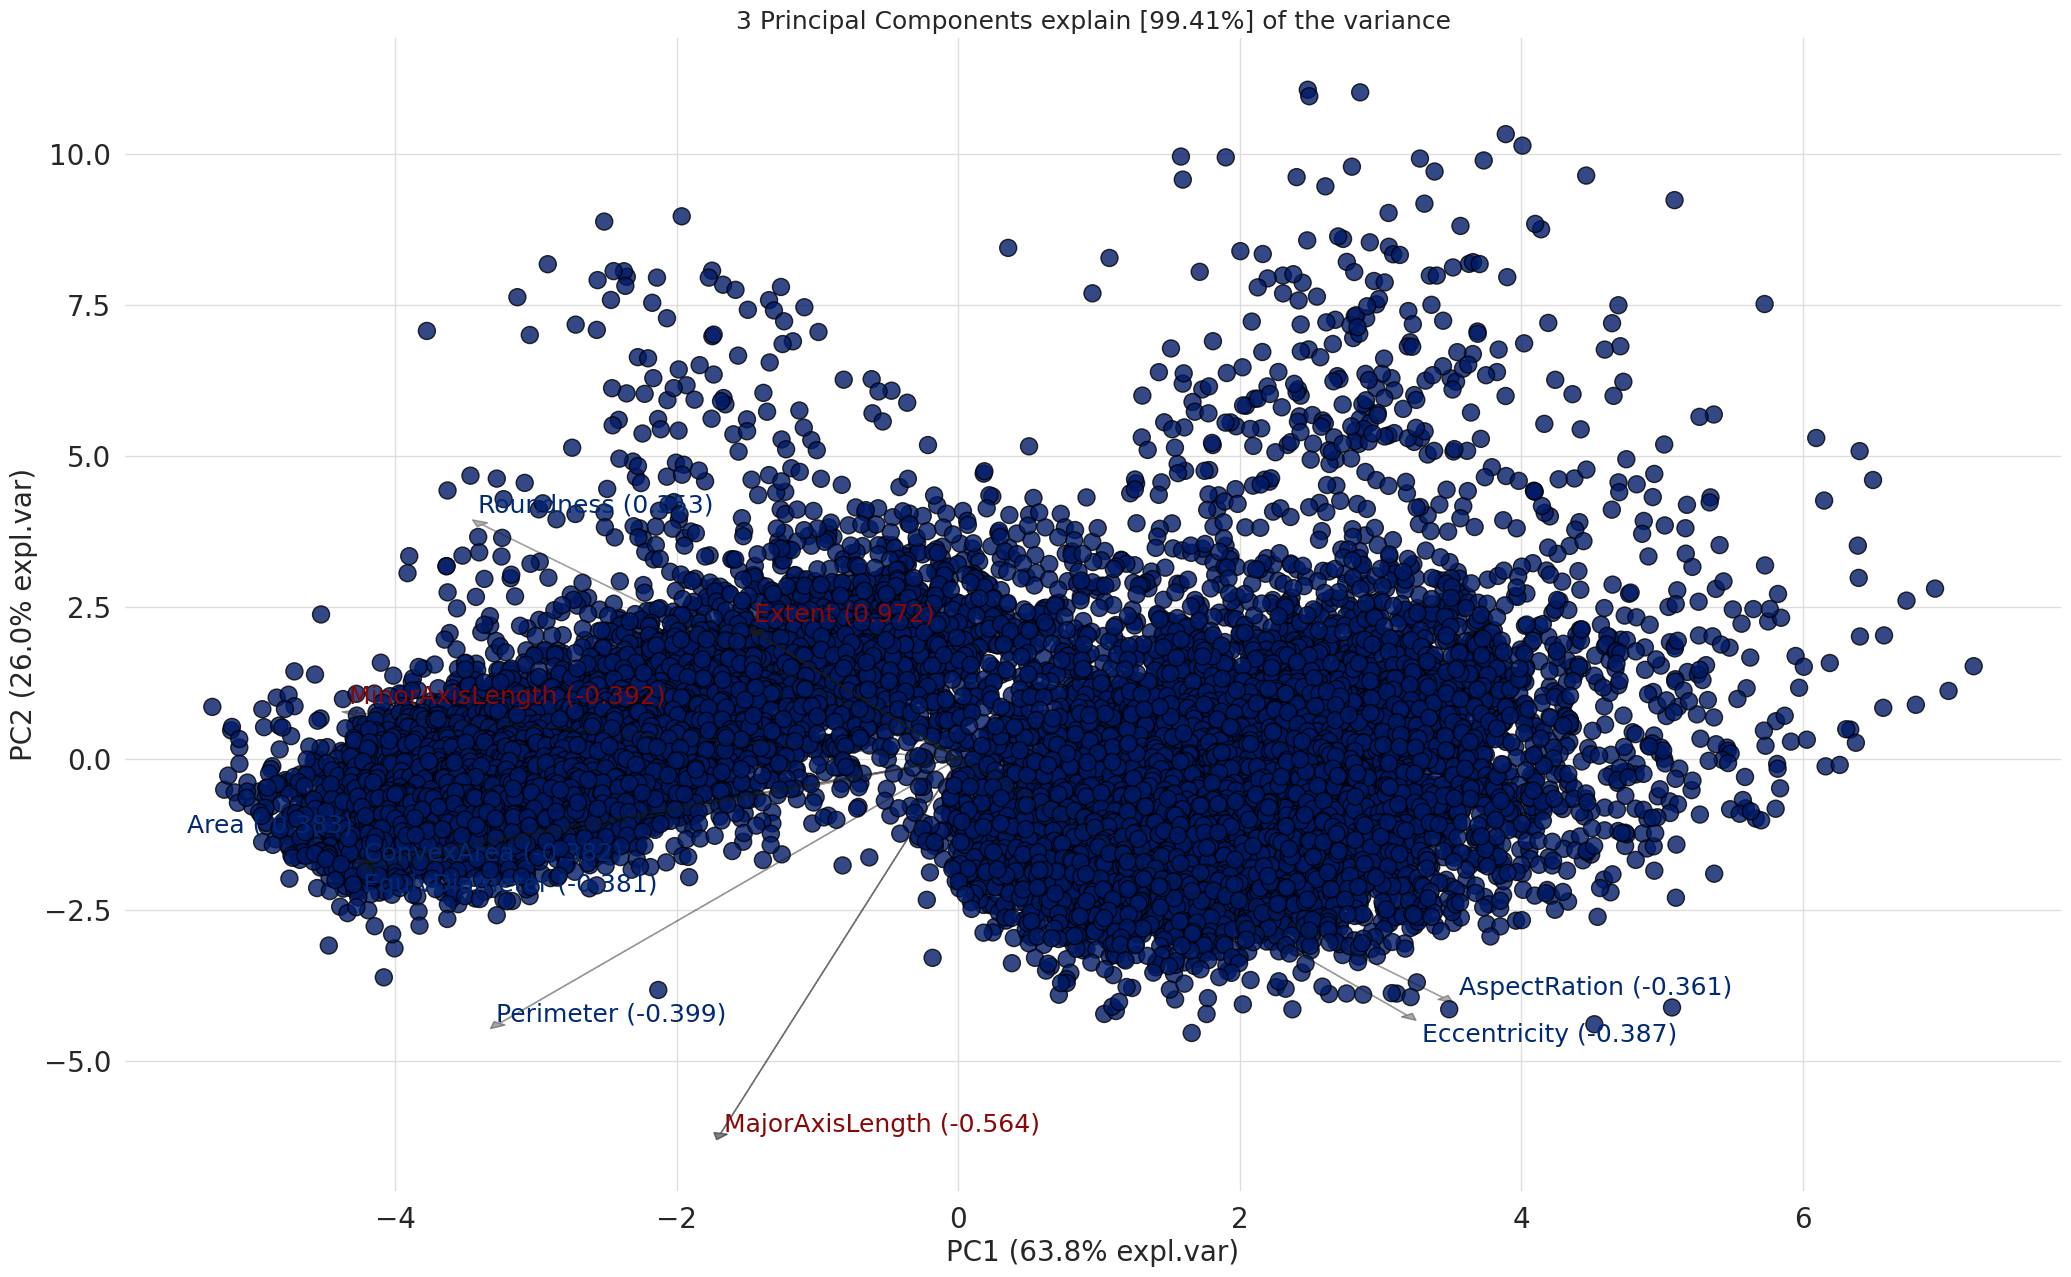

In [43]:
model.biplot(label=False, legend=False, color_arrow='k')

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3D: title={'center': '3 Principal Components explain [99.41%] of the variance'}, xlabel='PC1 (63.8% expl.var)', ylabel='PC2 (26.0% expl.var)', zlabel='PC3 (8.38% expl.var)'>)

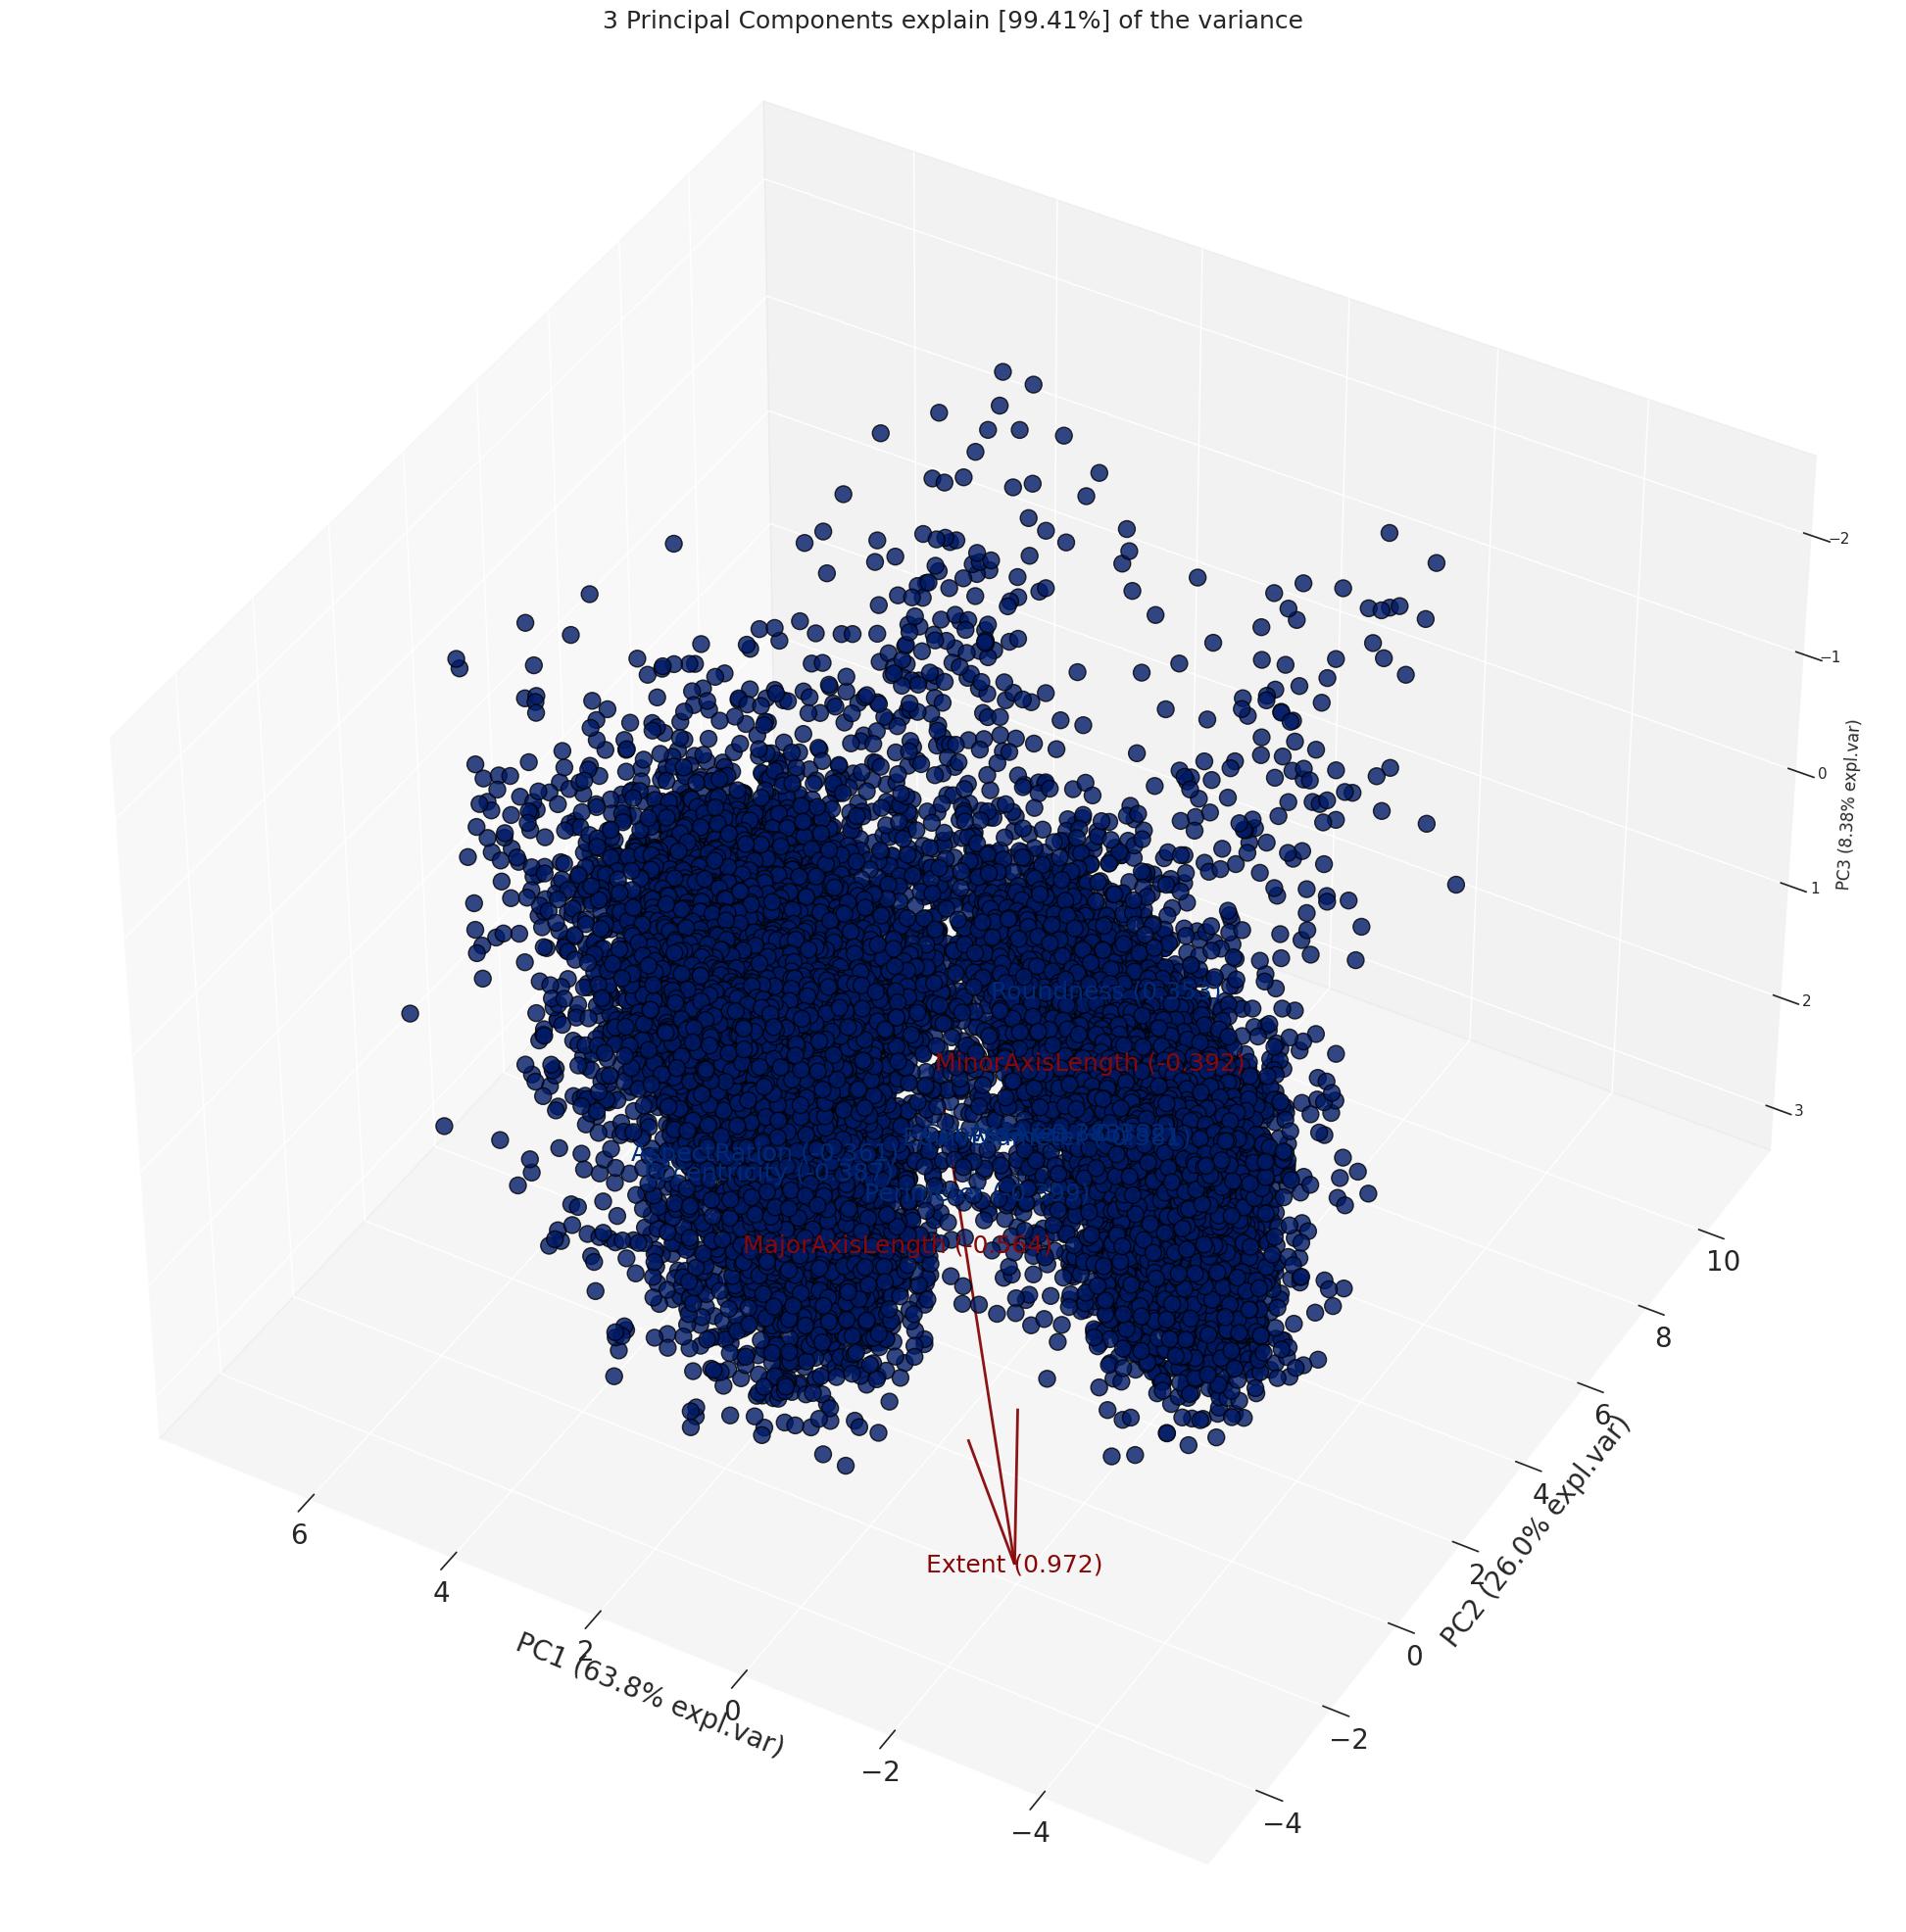

In [44]:
model.biplot3d(legend=False)